In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the boston_housing dataset

In [29]:
data = pd.read_csv("data/boston_housing.csv")

data.head(10)

,Unnamed: 0.1,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
0,0,0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,504.000000
1,1,1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,453.600008
2,2,2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,728.700016
3,3,3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,701.400032
4,4,4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,760.200016
5,5,5,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.21,602.700016
6,6,6,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.43,480.899992
7,7,7,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.15,569.100008
8,8,8,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.93,346.500000
9,9,9,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.10,396.899992


# Explore the data by
* Showing the first few rows
* Print the number of rows and columns of this dataset
* Giving a summary of the dataset

In [4]:
data.shape

(506, 16)

In [5]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,252.500000,3.623075,11.363636,11.136779,0.0,0.782968,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,473.188934
std,146.213884,146.213884,8.600805,23.322453,6.860353,0.0,1.225300,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,193.139186
min,0.000000,0.000000,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,105.000000
25%,126.250000,126.250000,0.082045,0.000000,5.190000,0.0,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,357.525002
50%,252.500000,252.500000,0.256510,0.000000,9.690000,0.0,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,445.200016
75%,378.750000,378.750000,3.689388,12.500000,18.100000,0.0,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,525.000000
max,505.000000,505.000000,88.976196,100.000000,27.740000,0.0,7.130000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,1050.000000


In [8]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Preprocessing
* Check for any NA values in the data, if necessary remove them
* Remove any non informative columns
* Make a histogram of the price column
* Convert all prices <800 to 0, all prices >=800 to 1 (we are making 2 groups)
* Make from these converted prices a barplot. Is this balanced data or not?

In [10]:
print("Columns containg empty values:\n",np.sum(data.isna(), axis=0))

Columns containg empty values:
 Unnamed: 0.1    0
Unnamed: 0      0
CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PT              0
B               0
LSTAT           0
Price           0
dtype: int64


In [16]:
data[np.any(data.isna(), axis=1)]

,Unnamed: 0.1,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price


In [25]:
data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,0.0
1,0.02731,0.0,7.07,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,0.0
2,0.02729,0.0,7.07,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,0.0
3,0.03237,0.0,2.18,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,0.0
4,0.06905,0.0,2.18,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,0.0
502,0.04527,0.0,11.93,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,0.0
503,0.06076,0.0,11.93,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,0.0
504,0.10959,0.0,11.93,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,0.0


In [30]:
data.drop(["Unnamed: 0.1", "Unnamed: 0", "CHAS"], axis = 1, inplace = True)

In [32]:
data.loc[data.Price<800, "Price"]=0
data.loc[data.Price>=800, "Price"]=1

<Axes: xlabel='Price', ylabel='count'>

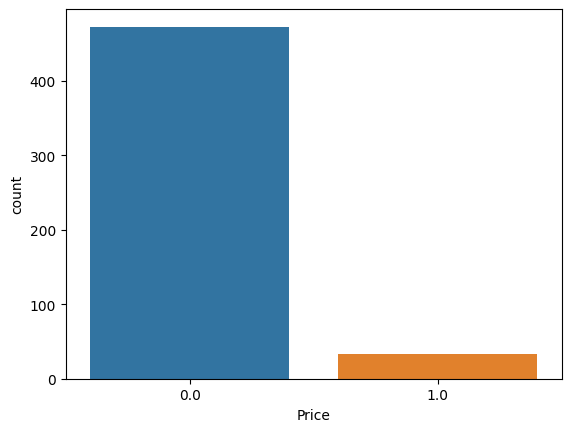

In [33]:
sns.countplot(data, x = "Price")
# This data is pretty much out of balance

# Clustering
* Use KMeans clustering to cluster the above data
    * Make sure you don't take price into consideration for the clustering
    * Determine the optimal number of clusters for this dataset, discuss why you would suggest this

In [34]:
# only working with the features of the dataset
X = data.drop("Price", axis = 1)

In [36]:
from sklearn.cluster import KMeans

In [37]:
wcss = []

for K in range(1, 11):
    # Initialize the model
    Kmodel = KMeans(n_clusters=K)
    # Calculate WCCSE for unscaled 
    Kmodel.fit(X)
    wcss.append(Kmodel.inertia_)

C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memor

Text(0, 0.5, 'WCSS')

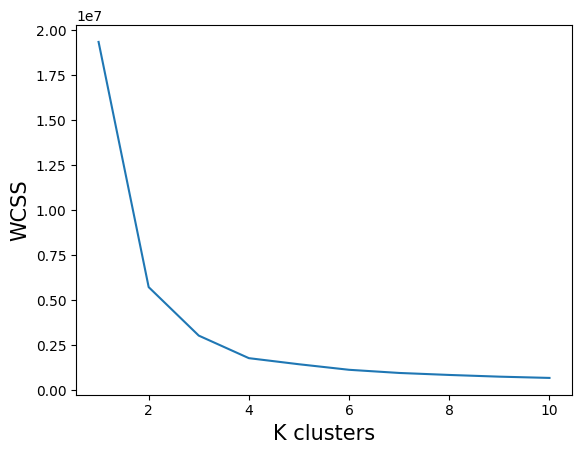

In [39]:
plt.plot(range(1, 11), wcss)
plt.xlabel('K clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15)

Optimal amount of cluster could be either 3 or 4 based on the elbow method

In [41]:
model = KMeans(n_clusters=4)
model.fit(X)

print("WCSS:", model.inertia_)

WCSS: 1781360.9667651318


C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


## Question
Is the best number of clusters in any way related to the steps we did before? (E.g., changing the price column into 2 classes)

-> No the Price columns should be splitted into 3 or 4 clusters

# Dimensionality reduction
* Perform a principal component analysis on the dataset. Compute two PCs.
* Plot the principal components you get, color the points based on the Price classes we made earlier.

In [43]:
from sklearn.decomposition import PCA

In [45]:
# Creating a 2D matrix
PCA_model = PCA(n_components=2)
#Since the data got changed need to fit and transform the data
PCA_data = PCA_model.fit_transform(X)
# Can change the array to a pandas dataframe
PCA_df = pd.DataFrame(data=PCA_data,columns=["PC1","PC2"])

Kmodel = KMeans(n_clusters=3)
# Fitting the data in the KMeans model & predicting the outcome of each variable
Kmodel.fit(PCA_df)
pred_Clus = Kmodel.predict(PCA_df)

C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='PC1', ylabel='PC2'>

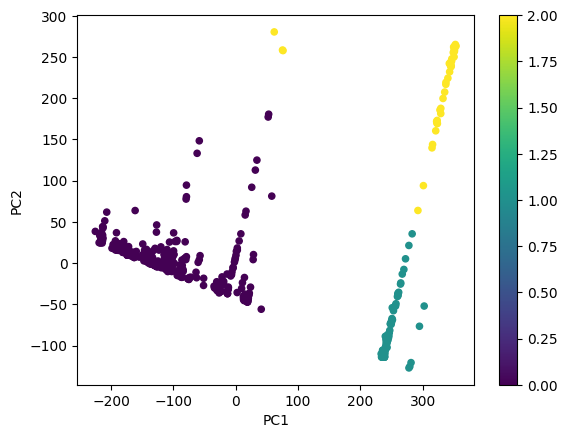

In [46]:
PCA_df.plot(x="PC1", y="PC2", kind="scatter", c=pred_Clus, cmap="viridis")

## Question
Can you see the number of cluster you selected earlier in this plot?

Yes the classes are present from the cluster made

Based on this plot, can you argue that the clusters represent the price classes?


## Classification model on PCA
* Create a classifier (you can choose which one) and train it on the PCA data
    * Check the performance, create a train and test split for this

In [49]:
PCA_model = PCA(n_components = 2)

features_PCA = PCA_model.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score, roc_curve,auc

X_train, X_test, y_train, y_test = train_test_split(features_PCA, data.Price, test_size=0.33)
# Added a max_iter to remove the warning message of convergence.
LRmodel=LogisticRegression(class_weight="balanced", max_iter=600)
LRmodel.fit(X_train, y_train)
print("The score of the Linear model using PCA data: ",LRmodel.score(X_train, y_train)) 

The score of the Linear model using PCA data:  0.3952802359882006


In [54]:
# Predicting the results of test set onto the model
y_pred = LRmodel.predict(X_test)
# Print classsification matrix
print(classification_report(y_test,y_pred))
# Display the confusion matrix
cf_test = confusion_matrix(y_test,y_pred)
matrix = ConfusionMatrixDisplay(cf_test)
matrix.plot()
plt.show()

              precision    recall  f1-score   support

         0.0       0.97      0.41      0.57       157
         1.0       0.08      0.80      0.14        10

    accuracy                           0.43       167
   macro avg       0.52      0.60      0.36       167
weighted avg       0.92      0.43      0.55       167



NameError: name 'ConfusionMatrixDisplay' is not defined